# **XCEPTION TRANSFER LEARNING WITHOUT DATA AUGMENTATION**

###**1. Import libraries**

In [ ]:
import os
import pandas as pd

import xml.etree.ElementTree as ET
import time
import math
import cv2
import imageio
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as image
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from keras.utils import np_utils
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import decode_predictions
from sklearn.metrics import classification_report
import albumentations as A

###**2. Connect to Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**3. Define paths and labels**

In [ ]:
#define original dataset path
image_path = '/content/drive/MyDrive/Project FindPet/dataset/FlickrDogDataset/original/Flickr-dog'
#define split dataset path
ds_path = '/content/drive/MyDrive/Project FindPet/dataset/FlickrDogDataset/dataSplit/'
# Number of classes in the dataset
num_of_categories = 42
#Image size 
image_size = 299
# Batch size for training
batch_size = 8

In [ ]:
#list of breeds
breed_list = sorted(os.listdir(image_path))
#Number of classes
num_classes = len(breed_list)
print("{} breeds".format(num_classes))

42 breeds


In [ ]:
# Define a time counter function to test the algorythms performance 
_start_time = time.time()

def process_time_starts():
    global _start_time 
    _start_time = time.time()

def time_elapsed():
    t_sec = round(time.time() - _start_time)
    (t_min, t_sec) = divmod(t_sec,60)
    (t_hour,t_min) = divmod(t_min,60) 
    print('The process took: {}hour:{}min:{}sec'.format(t_hour,t_min,t_sec))

In [ ]:
#Define dictionary of labels
label_maps_rev = {}
for i, v in enumerate(breed_list):
    label_maps_rev.update({i : v})

###**4. Load train, validation and test dataset**

In [ ]:
# create a data generator
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# load and iterate training dataset
train_it = datagen.flow_from_directory(ds_path+'train/', class_mode='categorical', target_size=(299, 299), batch_size=8)
# load and iterate validation dataset
val_it = datagen.flow_from_directory(ds_path+'val/', class_mode='categorical', target_size=(299, 299), batch_size=8)
# load and iterate test dataset
test_it = datagen.flow_from_directory(ds_path+'test/', class_mode='categorical', target_size=(299, 299), batch_size=8)

Found 237 images belonging to 42 classes.
Found 47 images belonging to 42 classes.
Found 90 images belonging to 42 classes.



###**5. Model Preparation**



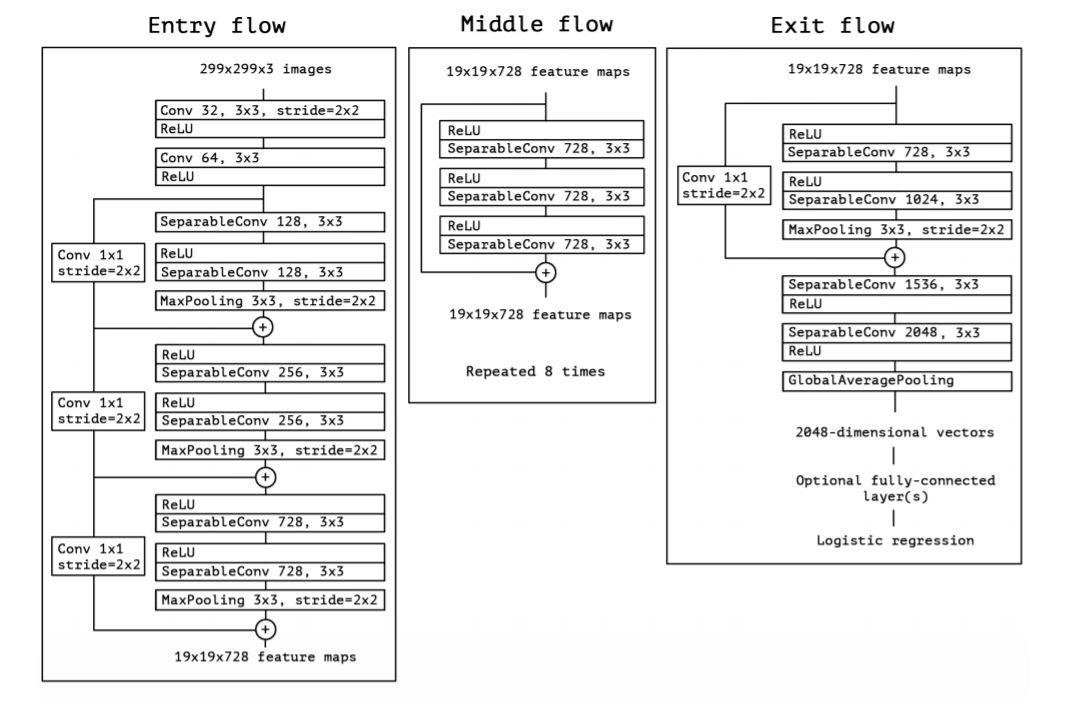

###**5.1.Importing the Xception CNN**

In [ ]:
#xception model using pre-trained weights of imagenet
#include_top is False to not include the fully connected layer on top of the network
base_model = tf.keras.applications.xception.Xception(weights='imagenet',include_top=False, pooling='avg')#Summary of Xception Model
#to only update the params of the new layers
base_model.trainable = False

83689472/83683744 [==============================] - 0s 0us/step


###**5.2 Add Fully connected layers**

In [ ]:
flat_dim = 5 * 5 * 2048
# Create a 'Sequential' model
my_model = Sequential(base_model)
#Add 3 Dense layers with relu activation function
my_model.add(Dense(1032, activation='relu',input_dim=flat_dim))
my_model.add(Dense(512, activation='relu'))
my_model.add(Dense(256, activation='relu'))
#Add Dense layer with softmax activation function
my_model.add(Dense(42, activation='softmax'))

###**5.3 Define callbacks and compile the model**

In [ ]:
###################
total_epoch = 40
learning_rate_init = 0.001
###################

In [ ]:
# Callbacks
#Path to save the best weights
checkpoint_filepath = '/content/drive/MyDrive/Project FindPet/dataset/FlickrDogDataset/best-weights.{epoch:02d}-{val_loss:.2f}.h5'
#Save the model weights each time an improvement is observed during training
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
#Define the optimizer
optimizer_ft = keras.optimizers.Adam( learning_rate=learning_rate_init)

In [ ]:
#Configures the model for training
my_model.compile(optimizer=optimizer_ft, loss='categorical_crossentropy', metrics=['accuracy'])


###**6. Training the model**



In [ ]:
process_time_starts()

hist = my_model.fit_generator(generator=train_it, steps_per_epoch=10, validation_data=val_it,  validation_steps=3, epochs=40)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
10/10 [==============================] - 84s 8s/step - loss: 3.6778 - accuracy: 0.0909 - val_loss: 3.3912 - val_accuracy: 0.0833
Epoch 2/40
10/10 [==============================] - 57s 6s/step - loss: 3.2314 - accuracy: 0.1169 - val_loss: 3.3630 - val_accuracy: 0.1250
Epoch 3/40
10/10 [==============================] - 40s 4s/step - loss: 2.8072 - accuracy: 0.1948 - val_loss: 3.1936 - val_accuracy: 0.2500
Epoch 4/40
10/10 [==============================] - 34s 4s/step - loss: 2.8751 - accuracy: 0.1818 - val_loss: 2.7577 - val_accuracy: 0.1667
Epoch 5/40
10/10 [==============================] - 34s 3s/step - loss: 2.4990 - accuracy: 0.3247 - val_loss: 2.6275 - val_accuracy: 0.2083
Epoch 6/40
10/10 [==============================] - 33s 3s/step - loss: 2.2888 - accuracy: 0.3377 - val_loss: 3.0596 - val_accuracy: 0.1250
Epoch 7/40
10/10 [==============================] - 35s 3s/step - loss: 2.3875 - accuracy: 0.3125 - val_loss: 2.2271 - val_accuracy: 0.2917
Epoch 8/40
10/10 [==

In [ ]:
time_elapsed()

###**7. Loss and Accuracy Visualization**

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(hist.history[met])
    ax[i].plot(hist.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])


###**8. Save model and parameters**

In [ ]:
my_model.save('/content/drive/MyDrive/Project FindPet/dataset/FlickrDogDataset/xception_witout_da.h5', overwrite=True) 
my_model.save_weights('/content/drive/MyDrive/Project FindPet/dataset/FlickrDogDataset/xcept_weights_without-da.h5', overwrite=True)
print("Saved model to disk")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Saved model to disk


###**9. Test model accuracy**

In [ ]:
test_loss, test_accuracy = my_model.evaluate_generator(generator=test_it,steps=int(10))

print("Test results \n Loss:",test_loss,'\n Accuracy',test_accuracy)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test results 
 Loss: 1.3006702661514282 
 Accuracy 0.612500011920929


###**10. Predict new images**

In [ ]:
def download_and_predict(url, filename):
    # download and save
    os.system("curl -s {} -o {}".format(url, filename))
    img = Image.open(filename)
    img = img.convert('RGB')
    img = img.resize((299, 299))
    img.save(filename)
    # show image
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis('off')
    # predict
    img = image.imread(filename)
    img = preprocess_input(img)
    probs = my_model.predict(np.expand_dims(img, axis=0))
    for idx in probs.argsort()[0][::-1][:5]:
        print("{:.2f}%".format(probs[0][idx]*100), "\t", label_maps_rev[idx].split("-")[-1])

In [ ]:
download_and_predict("https://i.ibb.co/9gsDrYZ/Lulu-01-crp.png",
                     "test_2.jpg")

99.12% 	 Lulu
0.32% 	 Rekel
0.22% 	 Kira
0.21% 	 Dakota
0.09% 	 Theresa
